In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from keras.models import load_model
import cv2
import mtcnn
from IPython.display import Audio
from os import listdir
from random import choice

In [2]:
model = load_model('Models/FED.h5')

In [3]:
def detect_mood(img):
    plt.imshow(img)
    plt.show()
    detector = mtcnn.MTCNN()
    faces = detector.detect_faces(img)
    if len(faces) > 0:
        x, y, w, h = faces[0]['box']
        img = img[y:y+h, x:x+w]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255
    img = cv2.resize(img, (48, 48), interpolation=cv2.INTER_AREA)
    label_dict = {0:'Angry',1:'Happy',2:'Sad'}
    img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
    img = img.reshape(1,48,48,1)
    result = model.predict(img)
    result = list(result[0])
    img_index = result.index(max(result))
    label = label_dict[img_index]
    print('\nUser Mood is', label, '\n')
    return label

In [4]:
def play_song(mood):
    if mood == 'Sad':
        songs = listdir('Playlist/Sad Songs/')
        playlist_path = 'Playlist/Sad Songs/'
    else:
        songs = listdir('Playlist/Happy Songs/')
        playlist_path = 'Playlist/Happy Songs/'
    
    song_choice = choice(songs)
    song_path = playlist_path + song_choice
    return song_path


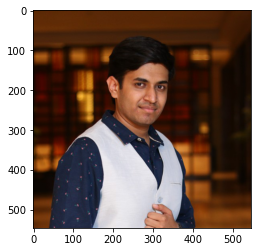


User Mood is Happy 



In [5]:
img = plt.imread('C:/Users/aksha/Desktop/Docs/Akshat Formal Pic.jpg')
user_mood = detect_mood(img)
song = play_song(user_mood)
Audio(song)